In [58]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions

import subprocess
from scipy.stats import chisquare
import os
import protfasta
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
d_domains = "../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files if f !='.ipynb_checkpoints']

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

In [64]:
# Below 0.01%
rare_output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 0.01 / 100, domain_types = ["AD", "DBD"], print_output = False)
rare_output

,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop
0,P15884,2004,129,0.064371,483,23,0.047619,0,0,NaN
1,O94983,3609,422,0.116930,882,99,0.112245,378,22,0.058201
2,Q96QS3,1689,141,0.083481,273,20,0.073260,180,3,0.016667
3,P20393,1845,202,0.109485,834,81,0.097122,231,12,0.051948
4,P11308,1440,126,0.087500,573,52,0.090750,243,5,0.020576
5,Q8NBF1,1863,276,0.148148,522,73,0.139847,0,0,NaN
6,Q06889,1164,95,0.081615,606,59,0.097360,0,0,NaN
7,Q9Y4A8,2085,322,0.154436,600,91,0.151667,0,0,NaN
8,P35398,1572,136,0.086514,342,14,0.040936,198,5,0.025253
9,Q9HBZ2,2154,206,0.095636,582,47,0.080756,0,0,NaN


In [65]:
SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")
rare_output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], rare_output)

In [66]:
# Performing Fisher's exact test
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(rare_output, "AD", "DBD")

[[47, 0], [535, 0]]
[[20, 3], [253, 177]]
[[76, 0], [389, 0]]
[[12, 0], [105, 0]]
[[99, 22], [783, 356]]
[[17, 0], [223, 0]]
[[59, 0], [547, 0]]
[[117, 27], [918, 171]]
[[73, 0], [449, 0]]
[[52, 5], [521, 238]]
[[318, 0], [2274, 0]]
[[35, 0], [211, 0]]
[[37, 0], [233, 0]]
[[26, 0], [106, 0]]
[[26, 0], [274, 0]]
[[30, 4], [390, 32]]
[[58, 1], [1103, 86]]
[[59, 5], [355, 184]]
[[14, 15], [88, 165]]
[[92, 0], [799, 0]]
[[68, 0], [754, 0]]
[[109, 0], [1121, 0]]
[[91, 0], [509, 0]]
[[12, 36], [237, 546]]
[[16, 31], [251, 551]]
[[81, 12], [753, 219]]
[[16, 9], [302, 219]]
[[31, 10], [131, 170]]
[[65, 9], [484, 171]]
[[12, 9], [153, 372]]
[[38, 13], [418, 368]]
[[23, 10], [127, 170]]
[[14, 5], [328, 193]]
[[38, 0], [889, 0]]
[[707, 3], [5005, 36]]
[[17, 40], [223, 524]]
[[115, 2], [866, 43]]
[[23, 0], [460, 0]]
[[16, 6], [284, 201]]
[[56, 0], [454, 0]]
[[75, 0], [984, 0]]
[[13, 17], [143, 208]]
[[28, 0], [260, 0]]
[[20, 34], [151, 194]]


In [67]:
rare_output_bh_sig = Variant_analysis_helper_functions.return_bh_sig(rare_output, "ADvsDBD_fisher_exact_p_vals", 0.1)
rare_output_bh_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,ADvsDBD_fisher_exact_p_vals
1,ARX,Q96QS3,1689,141,0.083481,273,20,0.073260,180,3,0.016667,0.007594
4,CAMTA2,O94983,3609,422,0.116930,882,99,0.112245,378,22,0.058201,0.002403
9,ERG,P11308,1440,126,0.087500,573,52,0.090750,243,5,0.020576,0.000132
17,MEIS2,O14770,1434,129,0.089958,414,59,0.142512,189,5,0.026455,0.000003
27,NKX2-2,O95096,822,105,0.127737,162,31,0.191358,180,10,0.055556,0.000178
28,OTX1,P32242,1065,105,0.098592,549,65,0.118397,180,9,0.050000,0.006793
29,PAX5,Q02548,1176,84,0.071429,165,12,0.072727,381,9,0.023622,0.012799
30,PAX6,P26367,1269,88,0.069346,456,38,0.083333,381,13,0.034121,0.003399
31,PITX1,P78337,945,123,0.130159,150,23,0.153333,180,10,0.055556,0.005042


In [68]:
rare_output_bh_sig[["gene-symbol", "uniprotID", "AD_missense_prop", "DBD_missense_prop", "TF_missense_prop"]]

,gene-symbol,uniprotID,AD_missense_prop,DBD_missense_prop,TF_missense_prop
1,ARX,Q96QS3,0.073260,0.016667,0.083481
4,CAMTA2,O94983,0.112245,0.058201,0.116930
9,ERG,P11308,0.090750,0.020576,0.087500
17,MEIS2,O14770,0.142512,0.026455,0.089958
27,NKX2-2,O95096,0.191358,0.055556,0.127737
28,OTX1,P32242,0.118397,0.050000,0.098592
29,PAX5,Q02548,0.072727,0.023622,0.071429
30,PAX6,P26367,0.083333,0.034121,0.069346
31,PITX1,P78337,0.153333,0.055556,0.130159


Text(0.5, 1.0, 'Rare Variants Only (<= 0.1%)')

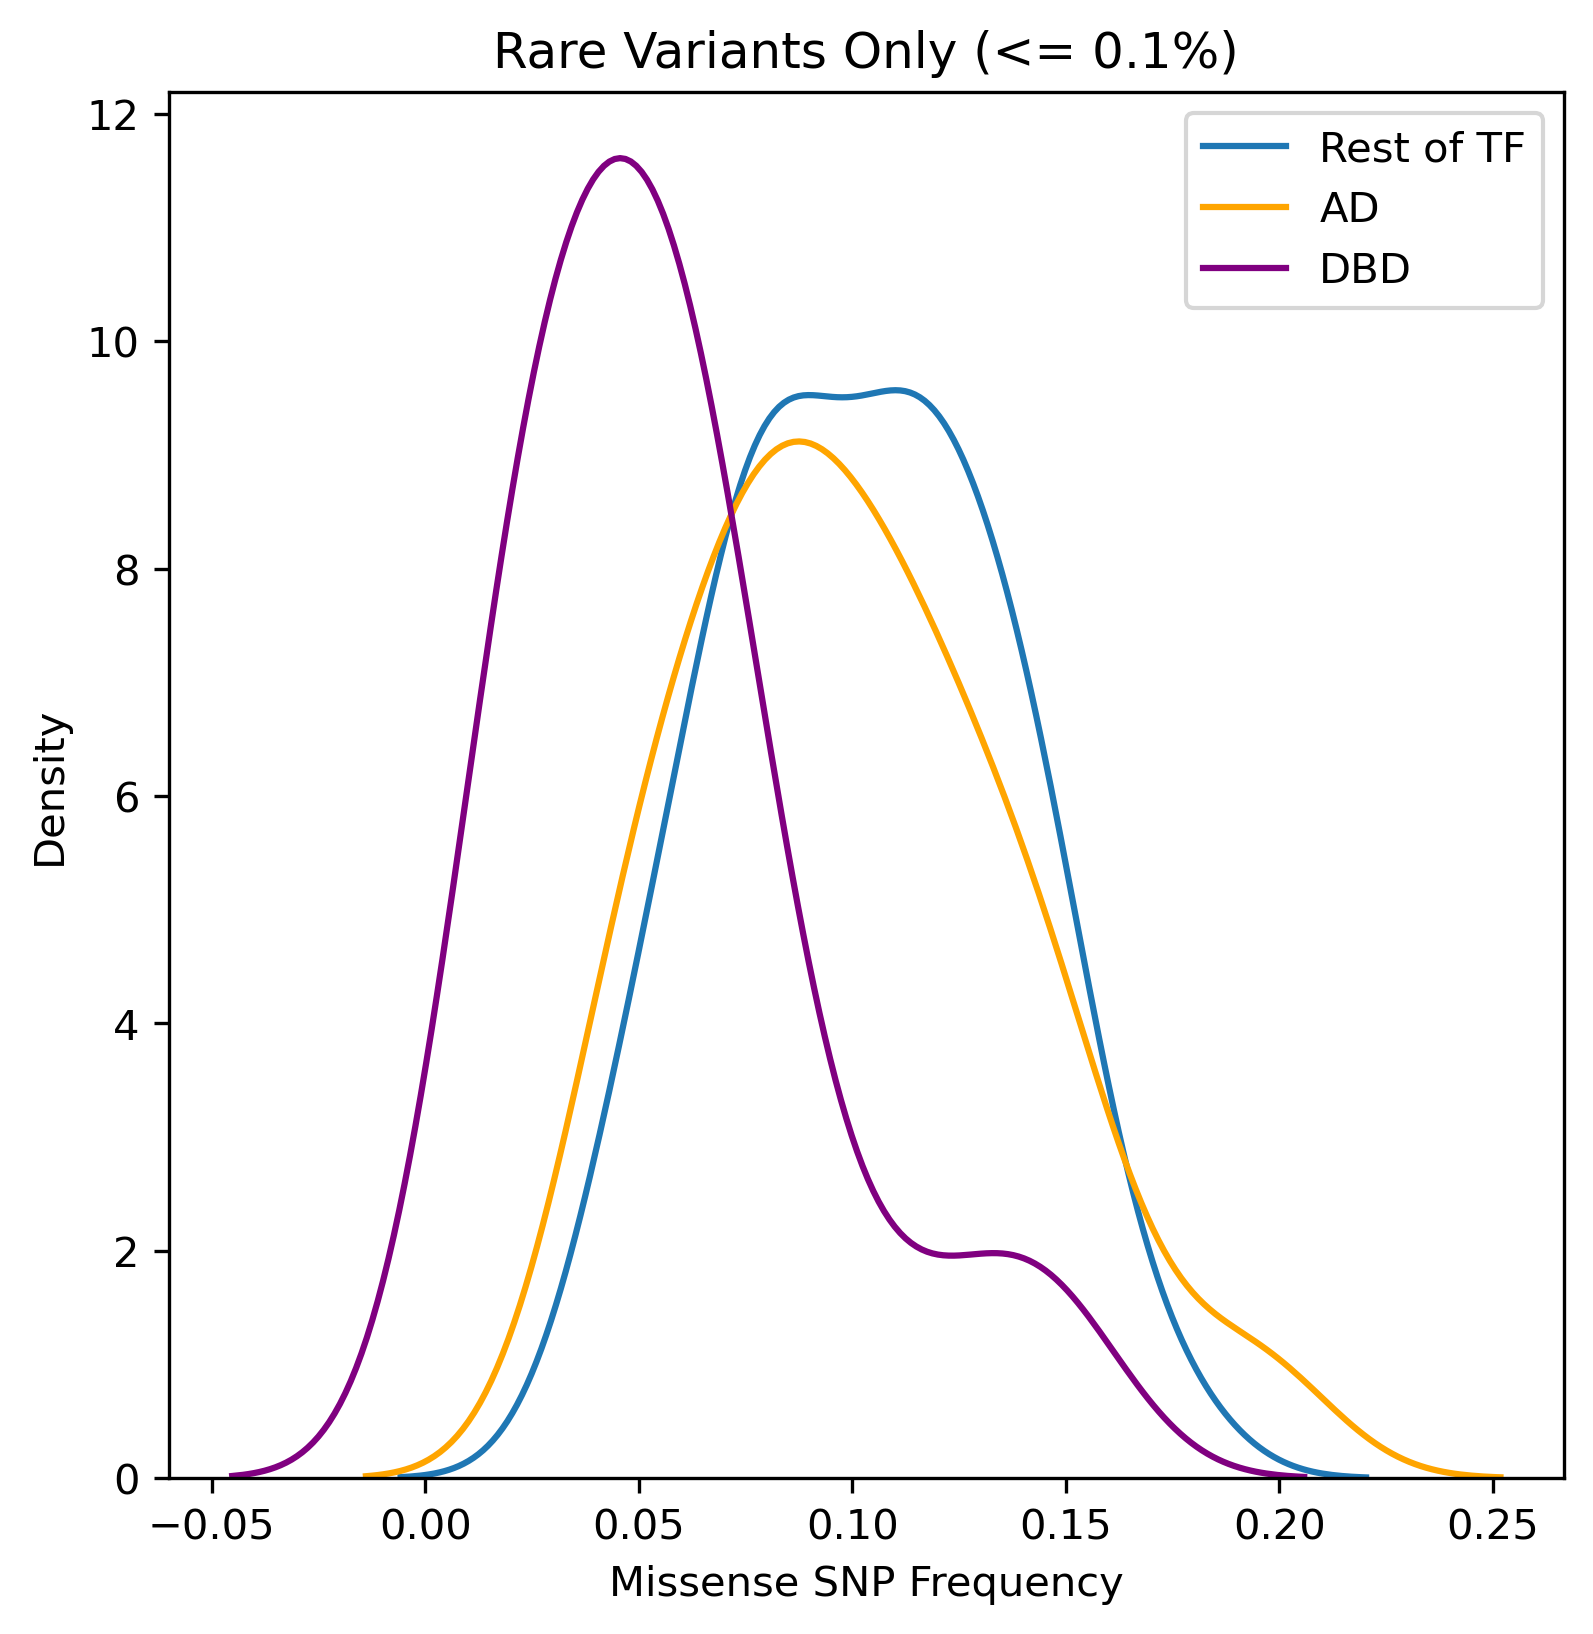

In [69]:
plt.figure(figsize = (6,6), dpi = 300);

rest_of_TF_num = (rare_output["TF_missense"] - rare_output["AD_missense"] - rare_output["DBD_missense"]) 
rest_of_TF_denom = rare_output["TF_cds_length"] - rare_output["AD_cds_length"] - rare_output["DBD_cds_length"]


sns.kdeplot(rest_of_TF_num / rest_of_TF_denom, label = "Rest of TF");
sns.kdeplot(rare_output["AD_missense_prop"], color = "orange", label = "AD");
sns.kdeplot(rare_output["DBD_missense_prop"], color = "purple", label = "DBD");


plt.legend()
plt.xlabel("Missense SNP Frequency")
plt.title("Rare Variants Only (<= 0.1%)")

Text(0.5, 1.0, 'Rare Variants Only (<= 0.1%)')

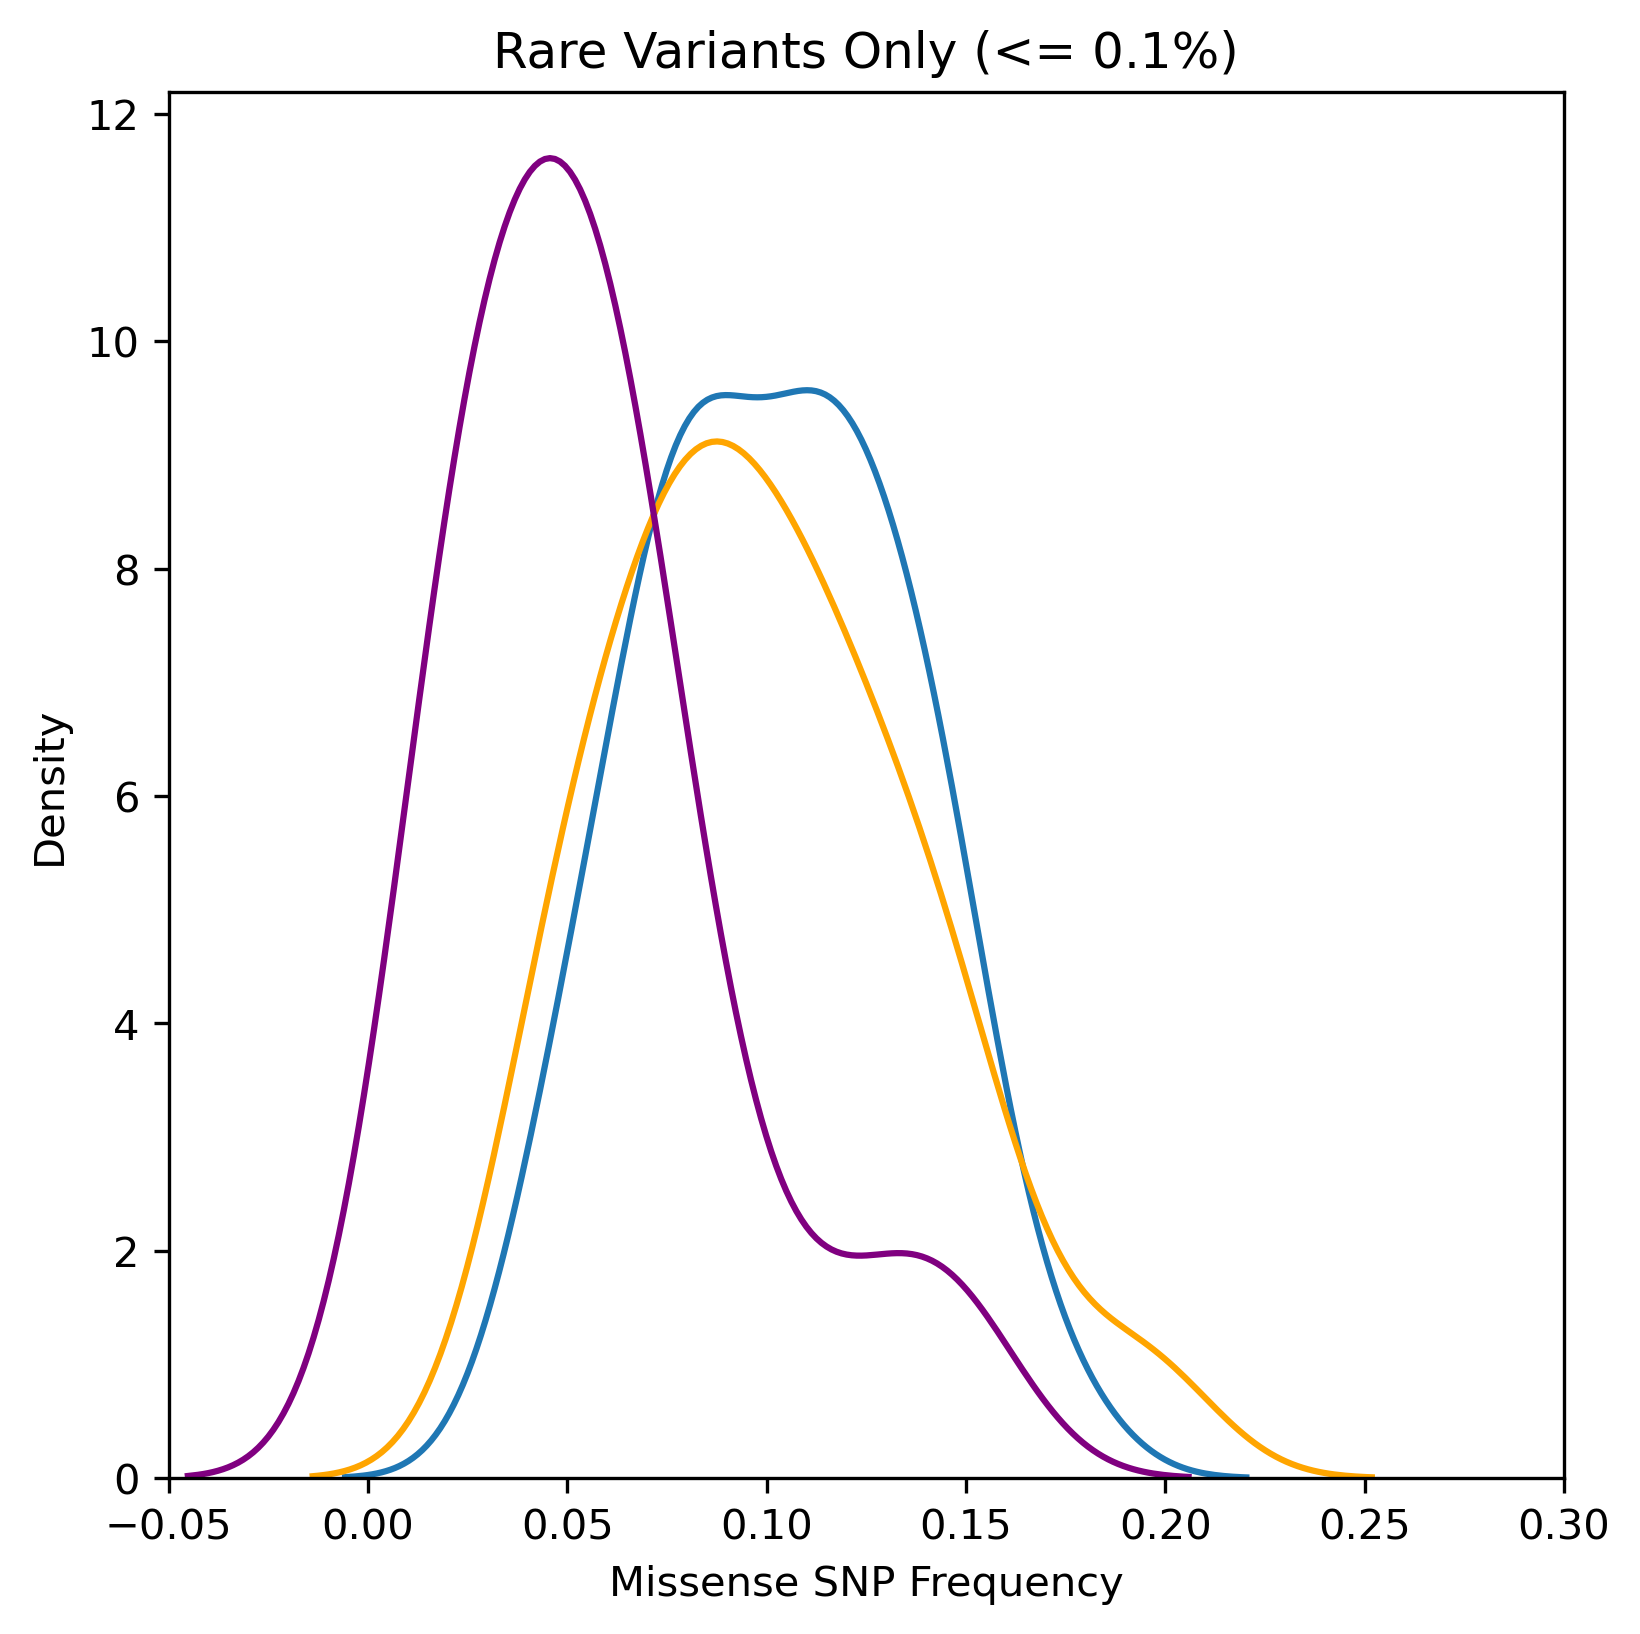

In [70]:
plt.figure(figsize = (6,6), dpi = 300);
plt.xlim(-0.05, 0.3)


rest_of_TF_num = (rare_output["TF_missense"] - rare_output["AD_missense"] - rare_output["DBD_missense"]) 
rest_of_TF_denom = rare_output["TF_cds_length"] - rare_output["AD_cds_length"] - rare_output["DBD_cds_length"]


sns.kdeplot(rest_of_TF_num / rest_of_TF_denom, label = "Rest of TF");
sns.kdeplot(rare_output["AD_missense_prop"], color = "orange", label = "AD");
sns.kdeplot(rare_output["DBD_missense_prop"], color = "purple", label = "DBD");


# plt.legend()
plt.xlabel("Missense SNP Frequency")
plt.title("Rare Variants Only (<= 0.1%)")